# Color Gradient Visualization Tool

This is a simple tool to help you visualize a custom color gradient in matplotlib before implementing it into your plots. You define your colors and their corresponding labels and you get a custom colorbar!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

**Make a list of colors and labels here in your preferred format (RGB or HSV):**

In [2]:
color_format = 'hsv' # This can be 'rgb' or 'hsv'

color_list = np.array([[0.0,0.0,0.5],  # H
                       [0.0,1,1.0],  # He
                       [0.33,1,0.9],  # C
                       [0.66,1,1],  # O
                       [0.9,0.1,1]]) # Ne

label_list = ['H', 'He', 'C', 'O', 'Ne']

**Some setup (no need to touch)**

In [3]:
# Set up colors
n_colors = len(color_list)

# Set up grid
cols = 500
rows = 50
xs = np.linspace(0,1,cols)
ys = np.linspace(0,1,rows)

**Calculating the pixels**

In [4]:
# Set up RGB image
image = np.zeros((rows,cols,3))

# Iterate over columns
for ic in range(cols):
    domain = int(np.floor(ic/cols * (n_colors-1)))
    progress = ic/cols * (n_colors-1) - domain
    for ir in range(rows):
        
        # This is a simple linear interpolation between the colors in the chosen format.
        # Replace this code with your own interpolation if necessary.
        
        if color_format == 'hsv':
            image[ir,ic] = colors.hsv_to_rgb(color_list[domain]*(1-progress) + color_list[domain+1]*progress)
        elif color_format == 'rgb':
            image[ir,ic] = color_list[domain]*(1-progress) + color_list[domain+1]*progress
        else:
            print("Incorrect color format ...")

**Plotting**

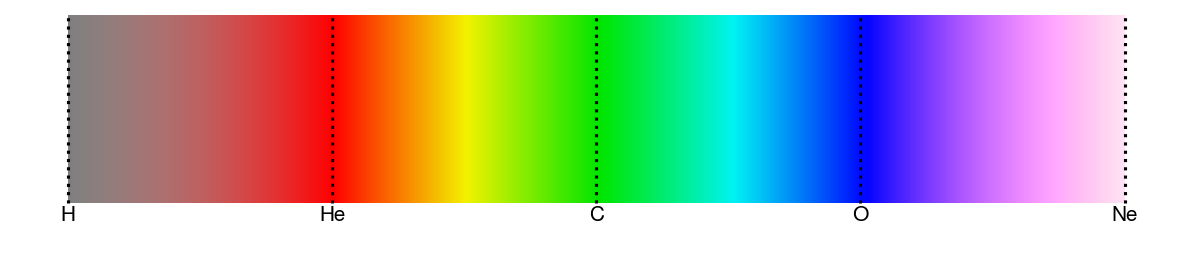

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,2),dpi=150)
ax.vlines(np.linspace(0, 1, len(color_list)),0,1,color='black',ls='dotted')
ax.set_ylim(-0.2,1)
ax.set_xlim(-0.05,1.05)
ax.imshow(image, aspect='auto', extent=(0,1,0,1))

for i in range(len(color_list)):
    ax.text(1/(len(color_list)-1)*i, -0.01, label_list[i], va='top', ha='center')

plt.axis('off')
plt.show()